C:\Users\ak135\AppData\Local\Temp\ipykernel_32804\689897600.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scd = pd.read_csv("D:/Internship/Project1/Sudden Cardiac Death Holter Database.csv")



Confusion Matrix:
[[    37    172      0      0      5]
 [     3 128097      2    149    795]
 [     0     12      0      0     17]
 [     0   2743      0    459    494]
 [     8   2373      0    183   7016]]

Accuracy: 0.9512


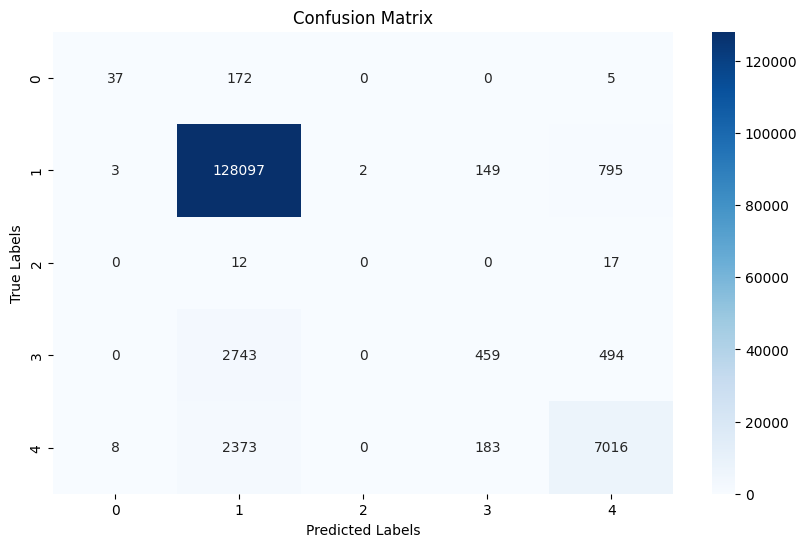

In [1]:
# Loading all the Libraries required for this model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Loading the datasets
df_mitbih = pd.read_csv("D:/Internship/Project1/MIT-BIH Arrhythmia Database.csv")
df_incart = pd.read_csv("D:/Internship/Project1/INCART 2-lead Arrhythmia Database.csv")
df_sv = pd.read_csv("D:/Internship/Project1/MIT-BIH Supraventricular Arrhythmia Database.csv")
df_scd = pd.read_csv("D:/Internship/Project1/Sudden Cardiac Death Holter Database.csv")

# Combining datasets
df = pd.concat([df_mitbih, df_incart, df_sv, df_scd], axis=0)

# Data Preprocessing
df.dropna(inplace=True)
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

# Feature selection and scaling
features = df.drop(['record', 'type'], axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
labels = df['type']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, 
    labels, 
    test_size=0.2, 
    random_state=42
)

# Logistic Regression Model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Visualizing Confusion Matrix
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()